Implementation of finite horizon Beta-Bernoulli bandit problems 
1. Greedy sampling
2. Thompson sampling

In [1]:
import numpy as np

In [2]:
def greedy_epsilon_sampling(probabilities, N, T, epsilon):

    # initialize
    
    # define play # holder
    K = np.zeros([N+1,T]).astype(int) # no of arms is rows + 1, no of stages is columns
    K[0:,0] = 0

    # define probability estimate holder
    phat = np.zeros([N+1,T]) # no of arms is rows, no of stages is columns
    alphas = np.zeros([N+1,T])
    betas = np.zeros([N+1,T])

    # initialize 
    alphas[0:,0] = np.array([0,1,1,1]) #np.concatenate(([0], np.random.randint(1,10,N)), axis = 0)
    betas[0:,0] = np.array([0,1,1,1]) # np.concatenate(([0], np.random.randint(1,10,N)), axis = 0)


    # populate arms with initial estimates
    for t in range(T-1):

        for i in range(1,N+1):
            phat[i,t] = (alphas[i,t])/(alphas[i,t] + betas[i,t]) # assign probabilities to arms

        # flip a coin to decide whether to explore or exploit
        decider = np.random.binomial(size = 1, n = 1, p = epsilon)
        #print(decider)

        # choose index of arm to pull
        if decider == 1:
            # if true play random arm
            at = np.random.randint(1,N+1,1)[0]
            #print("Explore new arm:", at)
        else:
            # if false play the arm with the highest probability
            at = np.random.choice(np.where(phat[:,t] == np.amax(phat[:,t]))[0]) # tie braker rule: random


        # update pulled arm
        zt = np.random.binomial(size=1, n=1, p = probabilities[at-1])
        alphas[at,t+1] = alphas[at,t] + zt
        betas[at,t+1] = betas[at,t] + (1 - zt)
        K[at,t] = K[at, t-1] + 1

        # update non-pulled arms
        for i in range(1,N+1):
            if i != at:
                alphas[i,t+1] = alphas[i,t]
                betas[i,t+1] = betas[i,t]
                K[i,t] = K[i, t-1]
    
    return(K)

In [3]:
def Thompson_sampling(probabilities, N, T):

    # initialize
    
    # define play # holder
    K = np.zeros([N+1,T]).astype(int) # no of arms is rows + 1, no of stages is columns
    K[0:,0] = 0

    # define probability estimate holder
    phat = np.zeros([N+1,T]) # no of arms is rows, no of stages is columns
    alphas = np.zeros([N+1,T])
    betas = np.zeros([N+1,T])

    # initialize 
    alphas[0:,0] = np.array([0,1,1,1]) #np.concatenate(([0], np.random.randint(1,10,N)), axis = 0)
    betas[0:,0] = np.array([0,1,1,1]) # np.concatenate(([0], np.random.randint(1,10,N)), axis = 0)


    # populate arms with initial estimates
    for t in range(T-1):

        for i in range(1,N+1):
            #print("alpha", np.absolute(alphas[i,t]))
            #print("beta", np.absolute(betas[i,t]))
            phat[i,t] = np.random.beta(np.absolute(alphas[i,t]), np.absolute(betas[i,t]), size = 1) # assign probabilities to arms
            
                  
        # if false play the arm with the highest probability
        at = np.random.choice(np.where(phat[:,t] == np.amax(phat[:,t]))[0]) # break ties randomly

        # update pulled arm
        zt = np.random.binomial(size=1, n=1, p = probabilities[at-1])
        alphas[at,t+1] = alphas[at,t] + zt
        betas[at,t+1] = betas[at,t] + (1 - zt)
        K[at,t] = K[at, t-1] + 1

        # update non-pulled arms
        for i in range(1,N+1):
            if i != at:
                alphas[i,t+1] = alphas[i,t]
                betas[i,t+1] = betas[i,t]
                K[i,t] = K[i, t-1]
    
    return(K)

In [4]:
N = 3
T = 1000
probabilities = np.array([0.9, 0.6, 0.3])

In [5]:
M = 10000
for i in range(M):
    np.random.seed(i)
    if i == 0:
        GE0 = greedy_epsilon_sampling(probabilities, N, T, 0) # greedy
        GE001 = greedy_epsilon_sampling(probabilities, N, T, 0.01) # epsilon greedy with 001
        GE01 = greedy_epsilon_sampling(probabilities, N, T, 0.1) # espilon greedy with 0.1
        TK = Thompson_sampling(probabilities, N, T)
        
    else:
        GE0 = GE0 + greedy_epsilon_sampling(probabilities, N, T, 0) # greedy
        GE001 = GE001 + greedy_epsilon_sampling(probabilities, N, T, 0.01) # greedy wiht 0.01
        GE01 = GE01 + greedy_epsilon_sampling(probabilities, N, T, 0.1) # epsilon greedy with 0.1
        TK = TK + Thompson_sampling(probabilities, N, T)
        
    #print(i)

In [6]:
greedy0K = np.true_divide(GE0, M)
greedy001K = np.true_divide(GE001, M)
greedy01K = np.true_divide(GE01, M)
ThompsonK = np.true_divide(TK, M)

In [7]:
greedy0K = np.hstack((np.array([[0,0,0,0]]).T, greedy0K))
greedy001K = np.hstack((np.array([[0,0,0,0]]).T, greedy001K))
greedy01K = np.hstack((np.array([[0,0,0,0]]).T, greedy01K))
ThompsonK = np.hstack((np.array([[0,0,0,0]]).T, ThompsonK))

In [8]:
greedy0K[0,:] = range(T+1)
greedy001K[0,:] = range(T+1)
greedy01K[0,:] = range(T+1)
ThompsonK[0,:] = range(T+1)

/Users/fietekrutein/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys
/Users/fietekrutein/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  
/Users/fietekrutein/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':
/Users/fietekrutein/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide
/Users/fietekrutein/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide
/Users/fietekrutein/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in true_divide


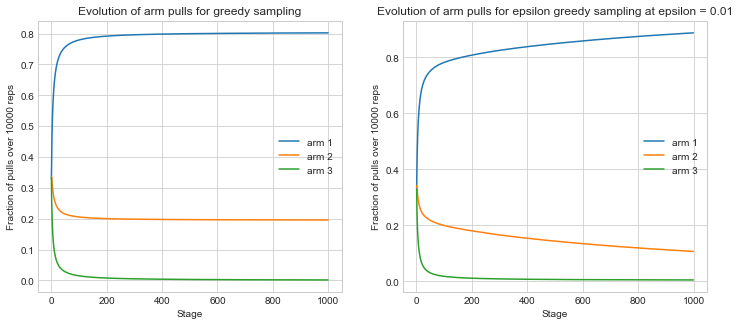

array([   0.,    1.,    2., ...,  998.,  999., 1000.])

In [9]:
from matplotlib import pyplot as plt

plt.style.use('seaborn-whitegrid')

plt.figure(figsize=[12,5])

arm1 = greedy0K[1,:T]/greedy0K[0,:T]
arm2 = greedy0K[2,:T]/greedy0K[0,:T]
arm3 = greedy0K[3,:T]/greedy0K[0,:T]
t = range(T)

plot1 = plt.subplot(121)
plt.plot(t, arm1, label = 'arm 1')
plt.plot(t, arm2, label = 'arm 2')
plt.plot(t, arm3, label = 'arm 3')
plt.xlabel("Stage")
plt.ylabel("Fraction of pulls over 10000 reps")
plt.legend(loc="center right")
plot1.set_title("Evolution of arm pulls for greedy sampling")

arm11 = greedy001K[1,:T]/greedy001K[0,:T]
arm21 = greedy001K[2,:T]/greedy001K[0,:T]
arm31 = greedy001K[3,:T]/greedy001K[0,:T]
# t = range(T)

plot2 = plt.subplot(122)
plt.plot(t, arm11, label = 'arm 1')
plt.plot(t, arm21, label = 'arm 2')
plt.plot(t, arm31, label = 'arm 3')
plt.xlabel("Stage")
plt.ylabel("Fraction of pulls over 10000 reps")
plt.legend(loc="center right")
plot2.set_title("Evolution of arm pulls for epsilon greedy sampling at epsilon = 0.01")

plt.savefig('Q5 Results 1.png', dpi = 800)

plt.show()

greedy0K[1,:]
greedy0K[0,:]

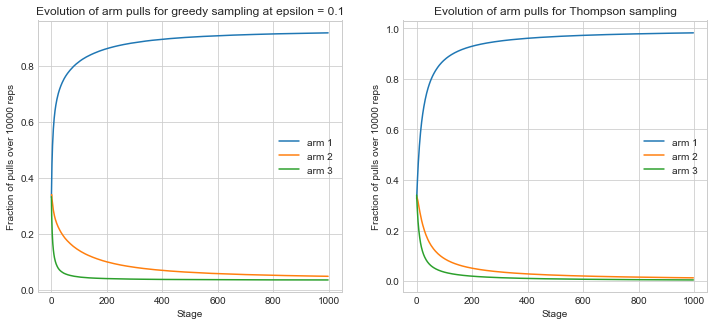

In [10]:
from matplotlib import pyplot as plt

plt.style.use('seaborn-whitegrid')

plt.figure(figsize=[12,5])

arm1 = greedy01K[1,1:T-1]/greedy01K[0,1:T-1]
arm2 = greedy01K[2,1:T-1]/greedy01K[0,1:T-1]
arm3 = greedy01K[3,1:T-1]/greedy01K[0,1:T-1]
t = range(T-2)

plot1 = plt.subplot(121)
plt.plot(t, arm1, label = 'arm 1')
plt.plot(t, arm2, label = 'arm 2')
plt.plot(t, arm3, label = 'arm 3')
plt.xlabel("Stage")
plt.ylabel("Fraction of pulls over 10000 reps")
plt.legend(loc="center right")
plot1.set_title("Evolution of arm pulls for greedy sampling at epsilon = 0.1")

arm11 = ThompsonK[1,1:T-1]/ThompsonK[0,1:T-1]
arm21 = ThompsonK[2,1:T-1]/ThompsonK[0,1:T-1]
arm31 = ThompsonK[3,1:T-1]/ThompsonK[0,1:T-1]
# t = range(T)

plot2 = plt.subplot(122)
plt.plot(t, arm11, label = 'arm 1')
plt.plot(t, arm21, label = 'arm 2')
plt.plot(t, arm31, label = 'arm 3')
plt.xlabel("Stage")
plt.ylabel("Fraction of pulls over 10000 reps")
plt.legend(loc="center right")
plot2.set_title("Evolution of arm pulls for Thompson sampling")

plt.savefig('Q5 Results 2.png', dpi = 800)

plt.show()